In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

### Import Data for both Models

In [2]:
## Import Boston and standardize
np.random.seed(123)
boston = datasets.load_boston()
X_boston = boston['data']
X_boston = (X_boston - X_boston.mean(0))/(X_boston.std(0))
y_boston = boston['target']

## Train-test split
np.random.seed(123)
test_frac = 0.25
test_size = int(len(y_boston)*test_frac)
test_idxs = np.random.choice(np.arange(len(y_boston)), test_size, replace = False)
X_boston_train = np.delete(X_boston, test_idxs, 0)
y_boston_train = np.delete(y_boston, test_idxs, 0)
X_boston_test = X_boston[test_idxs]
y_boston_test = y_boston[test_idxs]

## Import cancer and standardize
np.random.seed(123)
cancer = datasets.load_breast_cancer()
X_cancer = cancer['data']
X_cancer = (X_cancer - X_cancer.mean(0))/(X_cancer.std(0))
y_cancer = 1*(cancer['target'] == 1)

## Train-test split
np.random.seed(123)
test_frac = 0.25
test_size = int(len(y_cancer)*test_frac)
test_idxs = np.random.choice(np.arange(len(y_cancer)), test_size, replace = False)
X_cancer_train = np.delete(X_cancer, test_idxs, 0)
y_cancer_train = np.delete(y_cancer, test_idxs, 0)
X_cancer_test = X_cancer[test_idxs]
y_cancer_test = y_cancer[test_idxs]

# FeedForwardNeuralNetwork

In [3]:
# import package
from MyNN import FeedForwardNeuralNetwork

In [4]:
ffnn = FeedForwardNeuralNetwork()
ffnn.fit(X_boston_train, y_boston_train, n_hidden = 8)
y_boston_test_hat = ffnn.predict(X_boston_test)

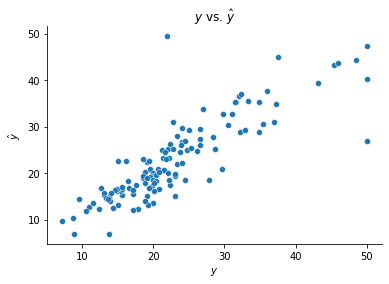

In [5]:
# plot results
fig, ax = plt.subplots()
sns.scatterplot(y_boston_test, y_boston_test_hat[0])
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'$y$ vs. $\hat{y}$')
sns.despine()
plt.show()